# **Importing all the required libraries**



---










In [6]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import ipywidgets as widgets
import plotly.express as px

# **Reading Data**

---

Let’s import the dataset and analyse the first 5 rows of the dataset 


In [ ]:
match = pd.read_csv('/content/drive/MyDrive/matches.csv')
match.head(5)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
delivery = pd.read_csv('/content/drive/MyDrive/deliveries.csv')
delivery.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# **Basic Statistics**

---


Let’s get a brief summary of the IPL matchset.

In [ ]:
match.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [ ]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
match.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
delivery.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [ ]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
delivery.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

# **Data Pre-processing**

---


### 1) Let's fill null values in city column based on venues values

In [ ]:
match[match['city'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [ ]:
conditions = [match["venue"] == "Rajiv Gandhi International Stadium, Uppal",match["venue"] == "Maharashtra Cricket Association Stadium",
              match["venue"] == "Saurashtra Cricket Association Stadium", match["venue"] == "Holkar Cricket Stadium",
              match["venue"] == "M Chinnaswamy Stadium",match["venue"] == "Wankhede Stadium",
              match["venue"] == "Eden Gardens",match["venue"] == "Feroz Shah Kotla",
              match["venue"] == "Punjab Cricket Association IS Bindra Stadium, Mohali",match["venue"] == "Green Park",
              match["venue"] == "Punjab Cricket Association Stadium, Mohali",match["venue"] == "Dr DY Patil Sports Academy",
              match["venue"] == "Sawai Mansingh Stadium", match["venue"] == "MA Chidambaram Stadium, Chepauk", 
              match["venue"] == "Newlands", match["venue"] == "St George's Park" , 
              match["venue"] == "Kingsmead", match["venue"] == "SuperSport Park",
              match["venue"] == "Buffalo Park", match["venue"] == "New Wanderers Stadium",
              match["venue"] == "De Beers Diamond Oval", match["venue"] == "OUTsurance Oval", 
              match["venue"] == "Brabourne Stadium",match["venue"] == "Sardar Patel Stadium", 
              match["venue"] == "Barabati Stadium", match["venue"] == "Vidarbha Cricket Association Stadium, Jamtha",
              match["venue"] == "Himachal Pradesh Cricket Association Stadium",match["venue"] == "Nehru Stadium",
              match["venue"] == "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium",match["venue"] == "Subrata Roy Sahara Stadium",
              match["venue"] == "Shaheed Veer Narayan Singh International Stadium",match["venue"] == "JSCA International Stadium Complex",
              match["venue"] == "Sheikh Zayed Stadium",match["venue"] == "Sharjah Cricket Stadium",
              match["venue"] == "Dubai International Cricket Stadium",match["venue"] == "M. A. Chidambaram Stadium",
              match["venue"] == "Feroz Shah Kotla Ground",match["venue"] == "M. Chinnaswamy Stadium",
              match["venue"] == "Rajiv Gandhi Intl. Cricket Stadium" ,match["venue"] == "IS Bindra Stadium",match["venue"] == "ACA-VDCA Stadium"]
values = ['Hyderabad', 'Mumbai', 'Rajkot',"Indore","Bengaluru","Mumbai","Kolkata","Delhi","Mohali","Kanpur","Mohali","Pune","Jaipur","Chennai","Cape Town","Port Elizabeth","Durban",
          "Centurion",'Eastern Cape','Johannesburg','Northern Cape','Bloemfontein','Mumbai','Ahmedabad','Cuttack','Jamtha','Dharamshala','Chennai','Visakhapatnam','Pune','Raipur','Ranchi',
          'Abu Dhabi','Sharjah','Dubai','Chennai','Delhi','Bengaluru','Hyderabad','Mohali','Visakhapatnam']
match['city'] = np.where(match['city'].isnull(),
                              np.select(conditions, values),
                              match['city'])

### 2) Checking unique values in team name’s columns and replacing two names for the same team with single name.

In [ ]:
match["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

Here we can see the name Delhi Daredevils and Delhi Capitals. Delhi Daredevils is the old name of the Delhi Capitals. Similarly, Deccan Chargers is the old name of Sunrisers Hyderabad. So we are changing the old name to the newer one.
Also we can see Rising Pune Supergiant and Rising Pune Supergiants so we have to replace it by one team only.

In [ ]:
match['team1'] = match['team1'].replace("Delhi Daredevils", "Delhi Capitals")
match['team2'] = match['team2'].replace("Delhi Daredevils", "Delhi Capitals")
match['toss_winner'] = match['toss_winner'].replace("Delhi Daredevils", "Delhi Capitals")
match['winner'] = match['winner'].replace("Delhi Daredevils", "Delhi Capitals")

match['team1'] = match['team1'].replace("Deccan Chargers", "Sunrisers Hyderabad")
match['team2'] = match['team2'].replace("Deccan Chargers", "Sunrisers Hyderabad")
match['toss_winner'] = match['toss_winner'].replace("Deccan Chargers", "Sunrisers Hyderabad")
match['winner'] = match['winner'].replace("Deccan Chargers", "Sunrisers Hyderabad")

match['team1'] = match['team1'].replace("Rising Pune Supergiant", "Rising Pune Supergiants")
match['team2'] = match['team2'].replace("Rising Pune Supergiant", "Rising Pune Supergiants")
match['toss_winner'] = match['toss_winner'].replace("Rising Pune Supergiant", "Rising Pune Supergiants")
match['winner'] = match['winner'].replace("Rising Pune Supergiant", "Rising Pune Supergiants")


### 3) Replacing string columns to numeric values.

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
match["city"]=encoder.fit_transform(match["city"])
match["team1"]=encoder.fit_transform(match["team1"])
match["team2"]=encoder.fit_transform(match["team2"])
match["winner"]=encoder.fit_transform(match["winner"])
match["toss_winner"]=encoder.fit_transform(match["toss_winner"])
match["toss_decision"]=encoder.fit_transform(match["toss_decision"])
match["venue"]=encoder.fit_transform(match["venue"])

### 4) Dropping insignificant columns having very large missing values.

The column ‘umpire3’ has a significant number of NaN values so we can drop this column.

In [ ]:
match = match.drop(columns=['umpire3'], axis=1)

### 5) Dropping all rows where winner values are missing. 

In [ ]:
match = match[match['winner'].notnull()]

# **Exploratory Data Analysis and Visualization**

---

## 1) Maximum number of wins by any team in particular seasons



In [ ]:
year = 2008
max_wins_by_team_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in max_wins_by_team.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        max_wins_by_team_df = max_wins_by_team_df.append(win_series)
        year += 1 

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


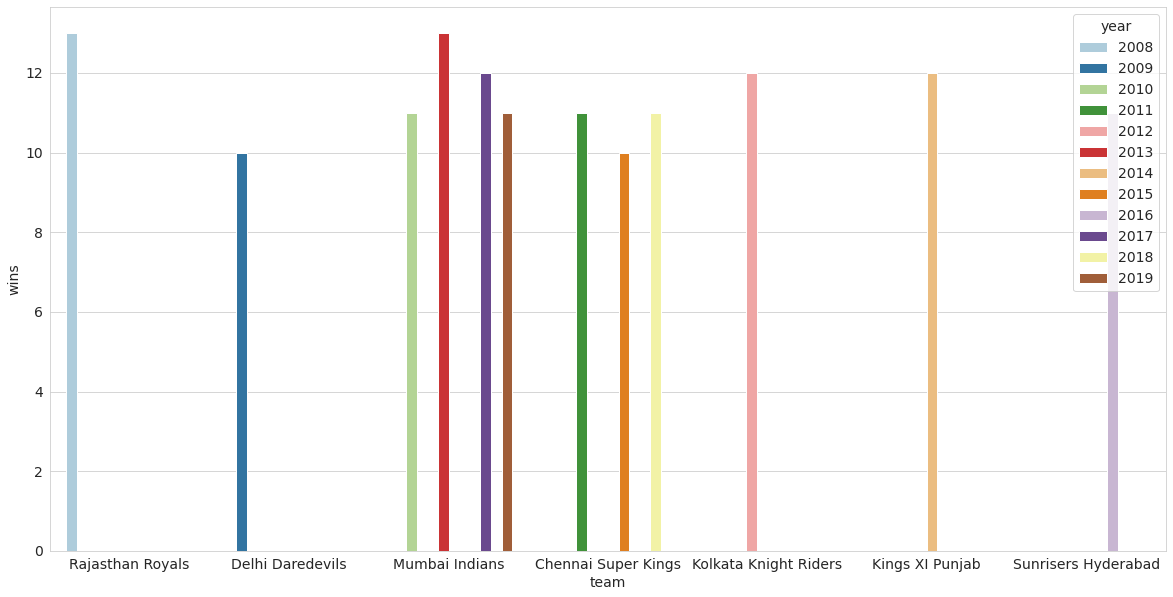

In [ ]:
sb.barplot('team', 'wins', hue='year', data=max_wins_by_team_df, palette='Paired');

### Observation:-

1)Mumbai Indians has secured the most wins in four seasons(2010, 2013, 2017, and 2019).

2)Mumbai Indians and Rajasthan Royals have won most number of matches in particular season that is 13 wins in 2013 and 2008 respectively.

## 2) Stadium hosting the most number of IPL matches

In [ ]:
venue = match['venue'].value_counts()
venue_df = pd.DataFrame(columns=['venue', 'matches'])
for items in venue.iteritems():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_df = venue_df.append(temp_df, ignore_index=True)
venue_df

,venue,matches
0,Eden Gardens,77
1,M Chinnaswamy Stadium,73
2,Wankhede Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Subrata Roy Sahara Stadium,17


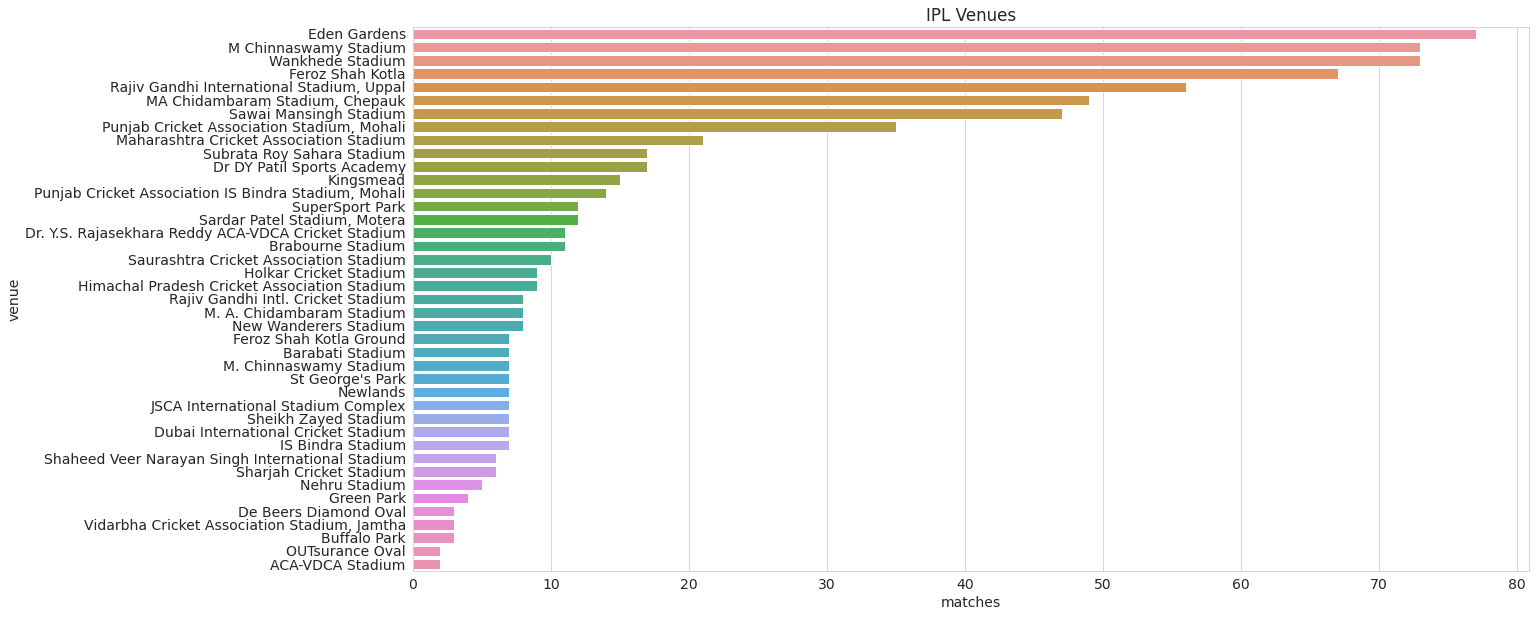

In [ ]:
plt.title("IPL Venues")
sb.barplot(x='matches', y='venue', data=venue_df);

### Observation:-

1)Eden Gardens has hosted most number of IPL Matches.

2) Till now IPL has been hosted in 41 different venues.

## 3) Team that has won the most number of matches

In [ ]:
team_wins = match['winner'].value_counts()

team_wins_df = pd.DataFrame(columns=["team", "wins"])
for items in team_wins.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_df = team_wins_df.append(temp_df1, ignore_index=True)
team_wins_df

,team,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


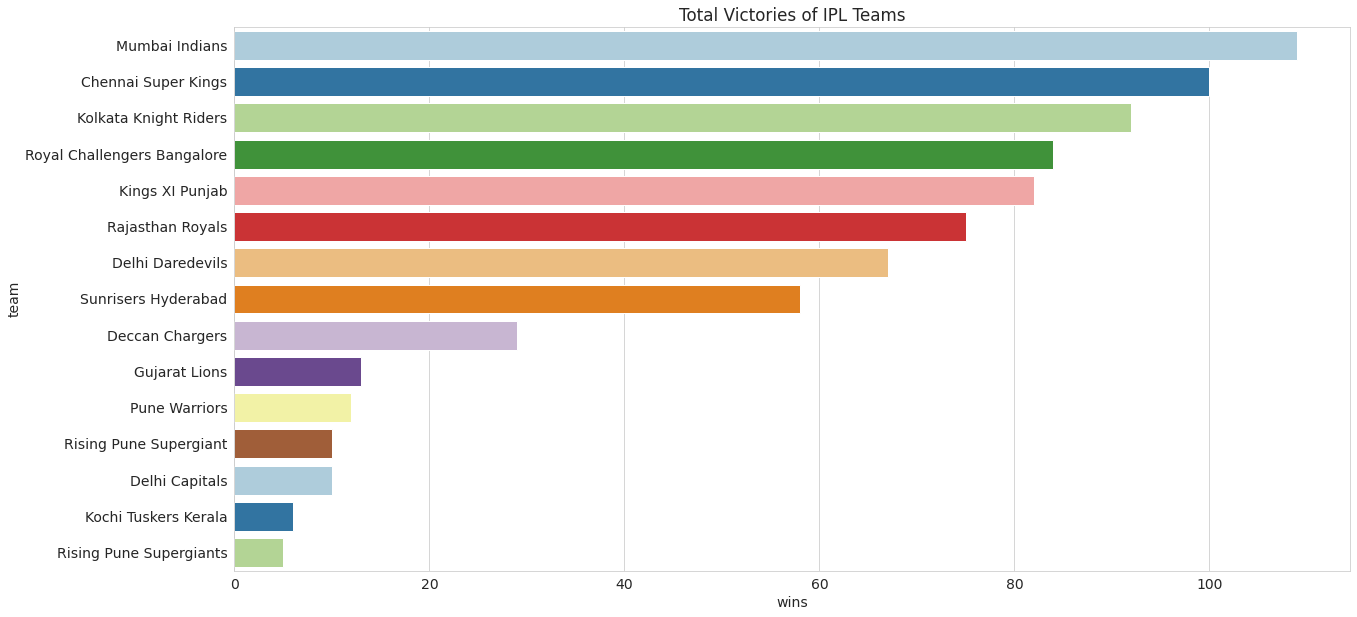

In [ ]:
plt.title("Total Victories of IPL Teams")
sb.barplot(x='wins', y='team', data=team_wins_df, palette='Paired');

### Observation:-

1) Mumbai Indians is the most successful team as they have won the maximum number of IPL matches 109 wins.

## 4) Player that has won the most number of Man of the Match awards

In [ ]:
man_of_the_match = match['player_of_match'].value_counts()

man_of_the_match_df = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in man_of_the_match.iteritems():
    if count>9:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        man_of_the_match_df = man_of_the_match_df.append(temp_df2, ignore_index=True)
        count += 1
man_of_the_match_df

,player,wins
0,CH Gayle,21
1,AB de Villiers,20
2,RG Sharma,17
3,MS Dhoni,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


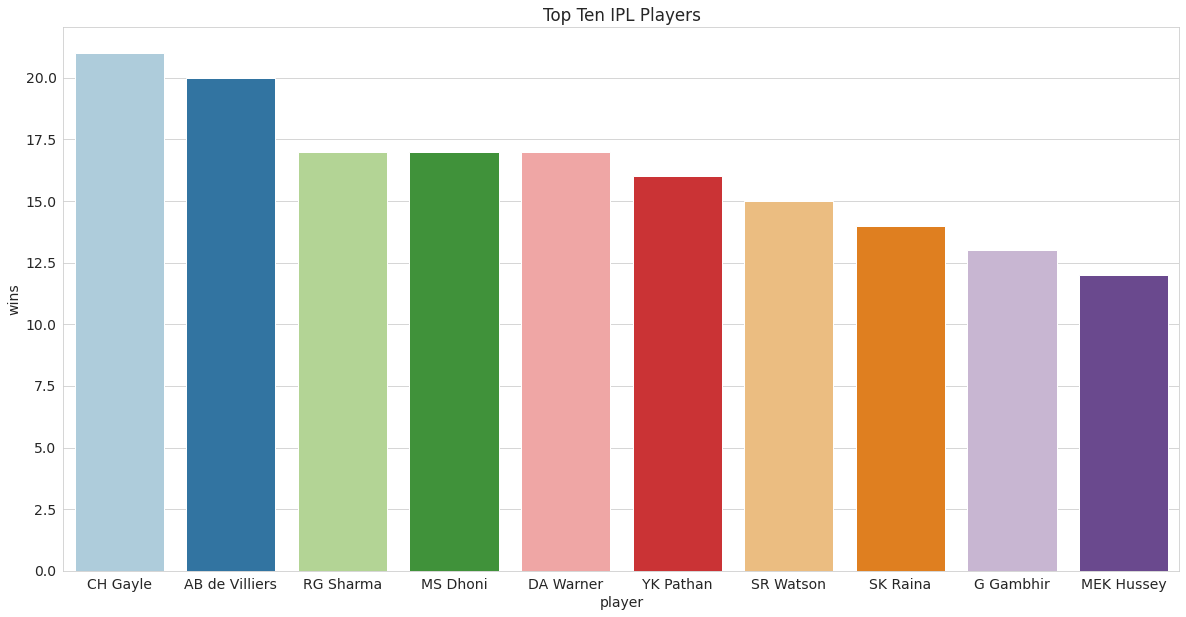

In [ ]:
plt.title("Top Ten IPL Players")
sb.barplot(x='player', y='wins', data=man_of_the_match_df, palette='Paired');

### Obervation:-

1) Chris Gayle has won most number of man of the match awards (21 awards).

2) Rohit Sharma is first Indian to win most man of the match awards(17 awards).

## 5) Team that has won the most tosses

In [ ]:
toss_won = match['toss_winner'].value_counts()

toss_won_df = pd.DataFrame(columns=["team", "wins"])

for items in toss_won.iteritems():
    temp_dpp1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_won_df = toss_won_df.append(temp_dpp1, ignore_index=True) 
toss_won_df

,team,wins
0,Mumbai Indians,98
1,Kolkata Knight Riders,92
2,Chennai Super Kings,89
3,Royal Challengers Bangalore,81
4,Kings XI Punjab,81
5,Delhi Daredevils,80
6,Rajasthan Royals,80
7,Sunrisers Hyderabad,46
8,Deccan Chargers,43
9,Pune Warriors,20


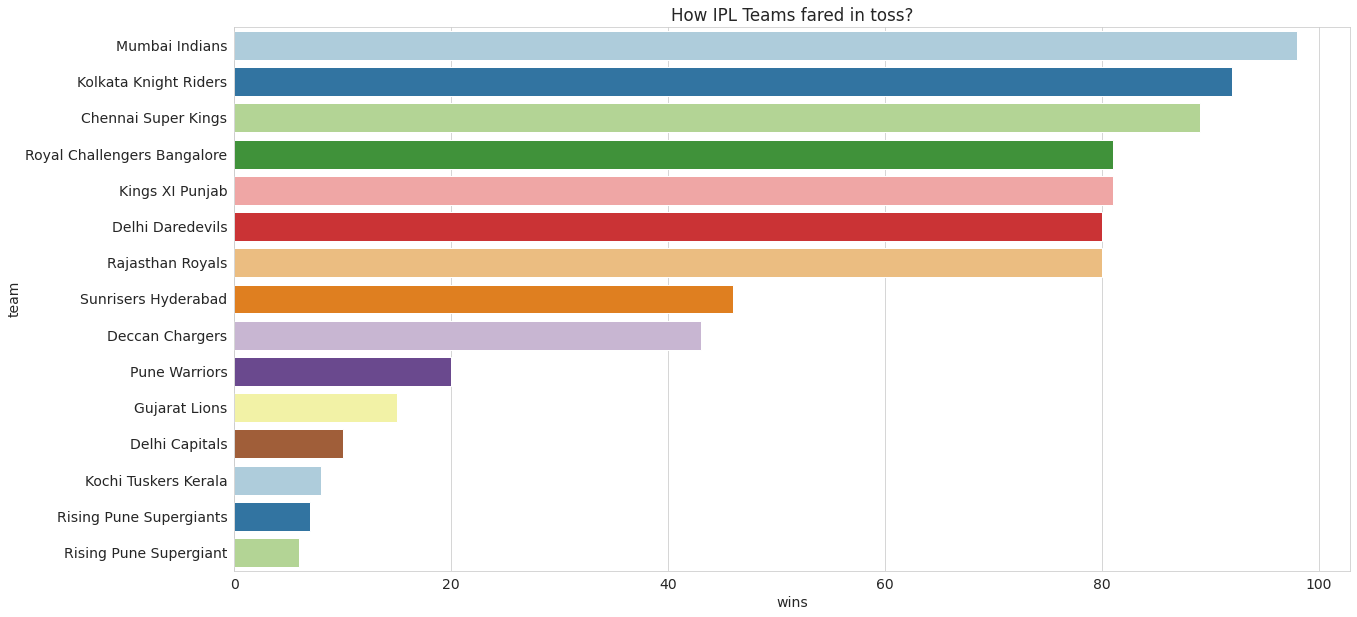

In [ ]:
plt.title("How IPL Teams fared in toss?")
sns.barplot(x='wins', y='team', data=toss_won_df, palette='Paired');

### Observation:-

1) Mumbai Indians has won the most toss in IPL history.

2) All the top teams in IPL are successful in winning the toss as well.

##  6) Top 10 greatest victories by runs and by wickets

In [ ]:
len(match)

756

Total matches played till now are 756

In [ ]:
defend_victory = match['win_by_runs'].value_counts()
defend_victory.sort_values(ascending=True)

118      1
130      1
60       1
87       1
62       1
      ... 
1       10
10      11
4       11
14      13
0      419
Name: win_by_runs, Length: 89, dtype: int64

In [ ]:
chasing_victory = match['win_by_wickets'].value_counts()
chasing_victory

0     350
6      85
7      80
5      71
8      54
4      41
9      37
3      18
10     11
2       6
1       3
Name: win_by_wickets, dtype: int64

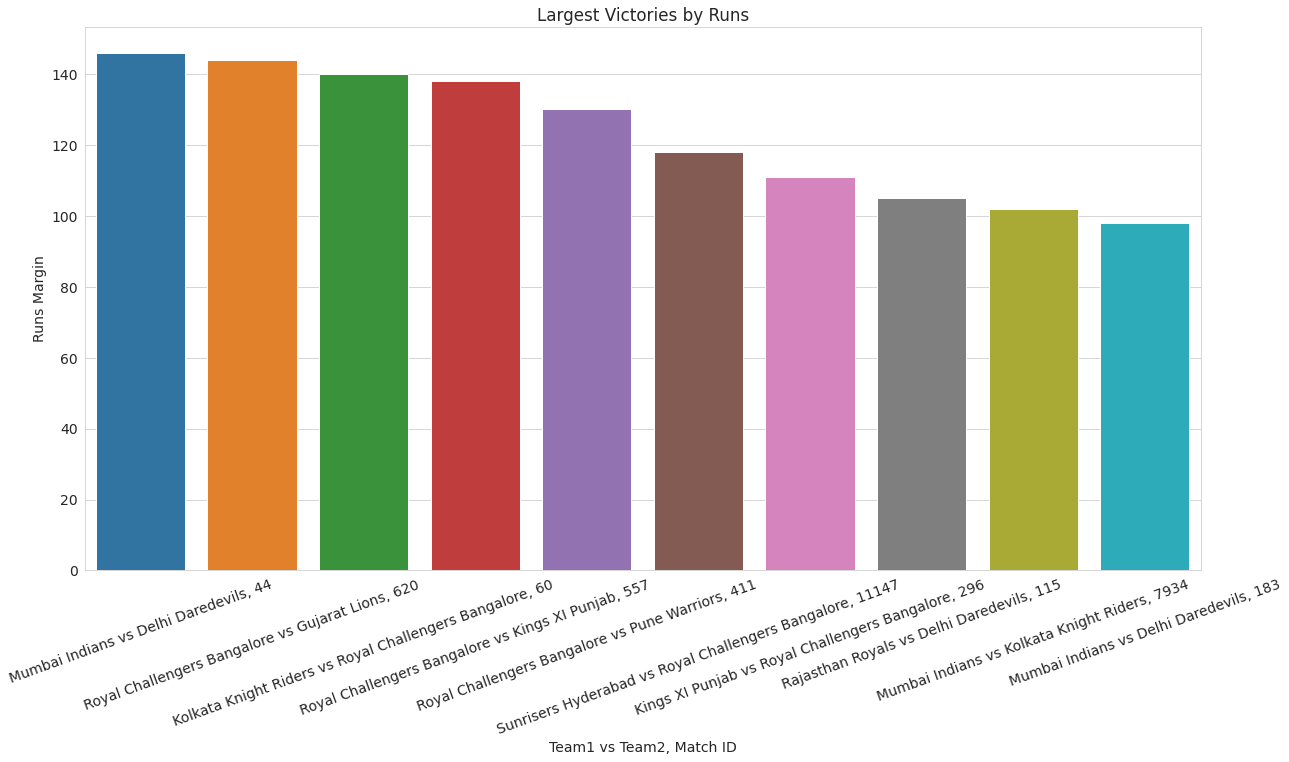

In [ ]:
sb.barplot(x='team1 vs team2', y='win_by_runs', data=vict_by_runs)
plt.xticks(rotation=20)
plt.title('Largest Victories by Runs')
plt.xlabel('Team1 vs Team2, Match ID')
plt.ylabel('Runs Margin')
plt.show()

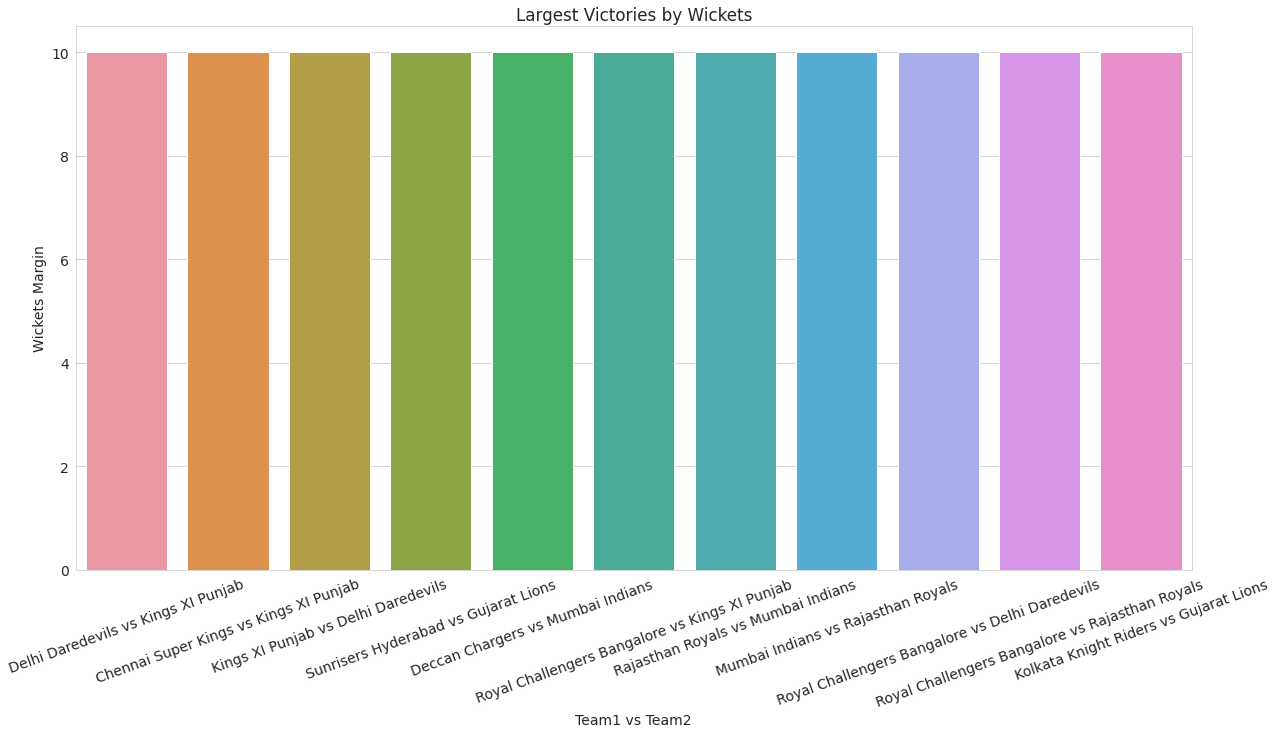

In [ ]:
sb.barplot(x='team2 vs team1', y='win_by_wickets', data=vict_by_wickets)
plt.xticks(rotation=20)
plt.title('Largest Victories by Wickets')
plt.xlabel('Team1 vs Team2')
plt.ylabel('Wickets Margin')
plt.show()

### Observation:-

1) Of the 756 IPL matches played from 2008 to 2019, 419 matches were won chasing the target. Hence, more victories were registered by teams chasing a total(batting second) than defending the total. When defending a total, the biggest victory was by 146 runs(Mumbai Indians vs Delhi Daredevils)

2)Of the 756 IPL matches played from 2008 to 2019, 350 matches were won defending the total. When chasing a target, the biggest victory was by 10 wickets(without losing any wickets) and there were 11 such instances.

## 7) Most 50s and 100s scored.

In [ ]:
fifties = delivery.groupby(['match_id', 'batsman']).sum().iloc[:,9].to_frame()
fifties = fifties[(fifties['batsman_runs']>=50) & (fifties['batsman_runs']<100)]
fifties_count = fifties.groupby('batsman').count().sort_values(by='batsman_runs')
fifties_count.columns=['50s']
fifties_count.reset_index(inplace=True)

hundreds = delivery.groupby(['match_id', 'batsman']).sum().iloc[:,9].to_frame()
hundreds= hundreds[hundreds['batsman_runs']>=100]
hundreds_count = hundreds.groupby('batsman').count().sort_values(by='batsman_runs')
hundreds_count.columns=['100s']
hundreds_count.reset_index(inplace=True)

In [ ]:
def plot_fifties(no_of_batsman):
  fig = px.line(fifties_count.tail(no_of_batsman), x='batsman', y='50s', title='Number of Fifties', height=500, width=900)
  fig.show()
no_of_batsman = np.arange(10,151,1)
widgets.interactive(plot_fifties, no_of_batsman=no_of_batsman)

interactive(children=(Dropdown(description='no_of_batsman', options=(10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2…

In [ ]:
def plot_hundreds(no_of_batsman):
  fig = px.line(hundreds_count.tail(no_of_batsman), x='batsman', y='100s', title='Number of Centuries', height=500, width=900)
  fig.show()
no_of_batsman = np.arange(8,37,1)
widgets.interactive(plot_hundreds, no_of_batsman=no_of_batsman)

NameError: ignored

In [ ]:
batsman_points = pd.merge(fifties_count, hundreds_count, how='left', left_on='batsman', right_on='batsman')
batsman_points.fillna(0, inplace=True)
batsman_points['points'] = batsman_points['50s']*5 + batsman_points['100s']*10
batsman_points.sort_values(by='points', inplace=True, ignore_index=True)
def plot_points(no_of_batsman):
  fig = px.line(batsman_points.tail(no_of_batsman), x='batsman', y='points', title='Points of Batsman on the basis of 100s and 50s', height=500, width=900)
  fig.show()
no_of_batsman = np.arange(10,150,1)
widgets.interactive(plot_points, no_of_batsman=no_of_batsman)

interactive(children=(Dropdown(description='no_of_batsman', options=(10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2…

### Observation:-

1) David Warner has scored most number of half-centuries(44).

2) Chris Gayle has scored most number of centuries(7).

3) David Warner has most number of points in terms of scoring half-centuries and centuries.



# **Machine** **Learning Tasks** 

---
## 1)Feature Engineering



In [9]:
a = match.iloc[:,[2,4,5,6,7,14]]
b = match.iloc[:,10]

Creating some new columns to get better understanding

In [21]:
pd.options.mode.chained_assignment = None  # To remove warning

a.loc[match['winner']==match['team1'],'team1_win'] = 1
a.loc[match['winner']!=match['team1'],'team1_win'] = 0

a.loc[match['toss_winner']==match['team1'],'team1_toss_win'] = 1
a.loc[match['toss_winner']!=match['team1'],'team1_toss_win'] = 0

a.loc[((match['toss_winner']==match['team1']) & (match['toss_decision']=='bat')),'team1_bat'] = 1
a.loc[((match['toss_winner']==match['team2']) & (match['toss_decision']=='field')),'team1_bat'] = 1

In [ ]:
#x.head()

In [22]:
display(a['team1_win'].value_counts())
display(a['team1_toss_win'].value_counts())
display(a['team1_bat'].value_counts())

0.0    421
1.0    335
Name: team1_win, dtype: int64

0.0    463
1.0    293
Name: team1_toss_win, dtype: int64

Series([], Name: team1_bat, dtype: int64)

We can see that all the values in team1_bat column are same and hence, of no use to us. Thus we drop this column

In [23]:
a.drop('team1_bat', axis=1, inplace=True)

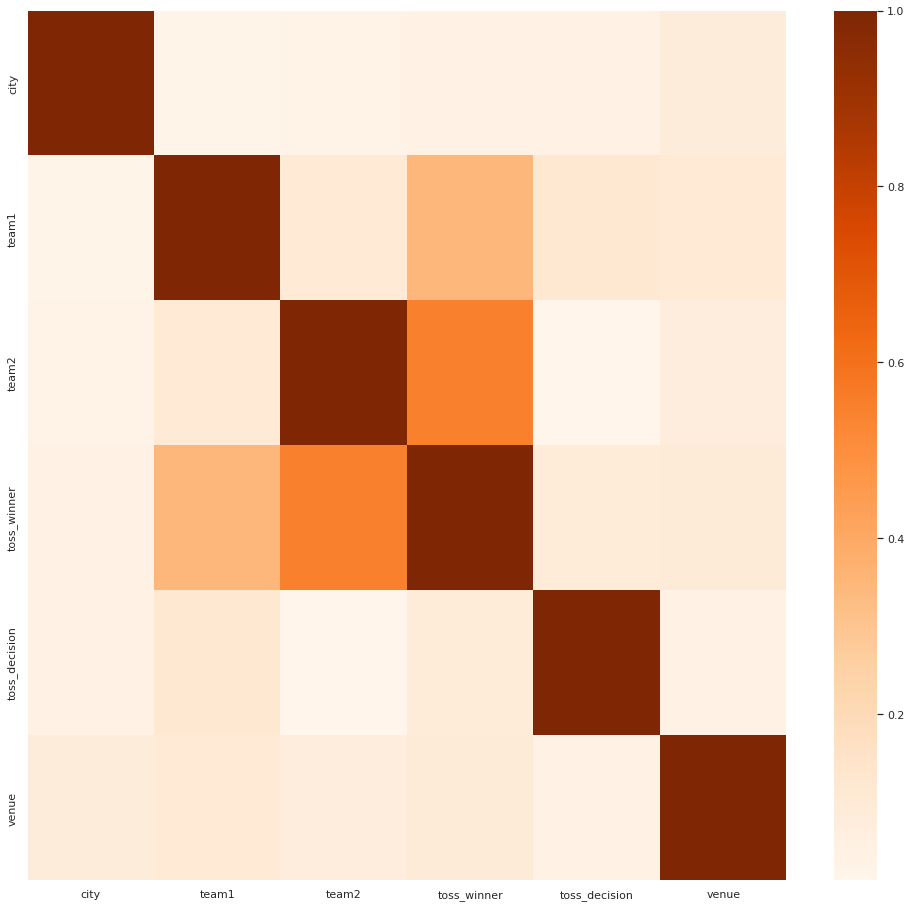

In [11]:
sb.heatmap(abs(a.corr()), cmap='Oranges')
sb.set(rc={'figure.figsize':(30,30)})
plt.show()

team1_toss_win is strongly correlated to toss_decision. Thus, we drop team1_toss_win

In [24]:
a.drop('team1_toss_win', axis=1, inplace=True)

## 2) ML Models

In [13]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

Splitting dataset into train-test set in 70:30

In [16]:
x_train, x_test, y_train, y_test = train_test_split(a, b, test_size=0.3, random_state=6, shuffle=True)
print(f'Shape of x_train : {x_train.shape}')
print(f'Shape of x_test : {x_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of x_train : (529, 6)
Shape of x_test : (227, 6)
Shape of y_train : (529,)
Shape of y_test : (227,)




### Random Forest Classifier

















In [ ]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
grid1 = {
    'n_estimators' : np.arange(100,401,50),
    'max_depth' : np.arange(5,31,5)
}
gs_rfc = GridSearchCV(RandomForestClassifier(), grid1, cv=4)
gs_rfc.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(


GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 5, 10, 15, 20, 25, 30]),
                         'n_estimators': array([100, 150, 200, 250, 300, 350, 400])})

In [ ]:
gs_rfc.best_params_

{'max_depth': 15, 'n_estimators': 150}

In [ ]:
RFC = RandomForestClassifier(n_estimators = gs_rfc.best_params_['n_estimators'], max_depth = gs_rfc.best_params_['max_depth'])
RFC.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=150)

In [ ]:
pred1 = RFC.predict(x_test)
print(f'Accuracy : {round(accuracy_score(y_test, pred1)*100,2)}%')
print(f'Precision : {round(precision_score(y_test, pred1, average="weighted")*100,2)}%')
print(f'Recall : {round(recall_score(y_test, pred1, average="weighted")*100,2)}%')
print(f'F1 Score : {round(f1_score(y_test, pred1, average="weighted")*100,2)}%')

Accuracy : 85.9%
Precision : 86.12%
Recall : 85.9%
F1 Score : 85.34%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree Classifier

In [ ]:
DecisionTreeClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [ ]:
grid2 = {
    'splitter' : ['best', 'random'],
    'max_depth' : np.arange(5,31,5),
    'random_state' : np.arange(1,30,4)
}
gs_dtc = GridSearchCV(DecisionTreeClassifier(), grid2, cv=4)
gs_dtc.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 5, 10, 15, 20, 25, 30]),
                         'random_state': array([ 1,  5,  9, 13, 17, 21, 25, 29]),
                         'splitter': ['best', 'random']})

In [ ]:
gs_dtc.best_params_

{'max_depth': 10, 'random_state': 17, 'splitter': 'random'}

In [ ]:
DTC = DecisionTreeClassifier(splitter = gs_dtc.best_params_['splitter'],
                             max_depth = gs_dtc.best_params_['max_depth'],
                             random_state = gs_dtc.best_params_['random_state'])
DTC.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=17, splitter='random')

In [ ]:
pred2 = DTC.predict(x_test)
print(f'Accuracy : {round(accuracy_score(y_test, pred2)*100,2)}%')
print(f'Precision : {round(precision_score(y_test, pred2, average="weighted")*100,2)}%')
print(f'Recall : {round(recall_score(y_test, pred2, average="weighted")*100,2)}%')
print(f'F1 Score : {round(f1_score(y_test, pred2, average="weighted")*100,2)}%')

Accuracy : 99.12%
Precision : 98.4%
Recall : 99.12%
F1 Score : 98.73%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM

In [ ]:
SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [25]:
grid3 = {
    'decision_function_shape' : ['ovo', 'ovr'],
    'degree' : np.arange(3,6),
    'random_state' : np.arange(1,30,4)
}
gs_svc = GridSearchCV(SVC(), grid3, cv=4)
gs_svc.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(


GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'degree': array([3, 4, 5]),
                         'random_state': array([ 1,  5,  9, 13, 17, 21, 25, 29])})

In [26]:
gs_svc.best_params_

{'decision_function_shape': 'ovo', 'degree': 3, 'random_state': 1}

In [27]:
svc = SVC(decision_function_shape = gs_svc.best_params_['decision_function_shape'],
          degree = gs_svc.best_params_['degree'],
          random_state = gs_svc.best_params_['random_state'])
svc.fit(x_train, y_train)

SVC(decision_function_shape='ovo', random_state=1)

In [28]:
pred3 = svc.predict(x_test)
print(f'Accuracy : {round(accuracy_score(y_test, pred3)*100,2)}%')
print(f'Precision : {round(precision_score(y_test, pred3, average="weighted")*100,2)}%')
print(f'Recall : {round(recall_score(y_test, pred3, average="weighted")*100,2)}%')
print(f'F1 Score : {round(f1_score(y_test, pred3, average="weighted")*100,2)}%')

Accuracy : 40.09%
Precision : 37.32%
Recall : 40.09%
F1 Score : 36.83%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree Classifier model has best accuracy.

# Regression Models

---



### Feature Engineering

In [33]:
dpp1 = pd.merge(match, delivery, left_on='id', right_on='match_id', how='right')
dpp1 = dpp1[dpp1['season'].notnull()]

In [34]:
dpp1['id'] = dpp1['id'].astype('int')
dpp1['season'] = dpp1['season'].astype('int')
dpp1['dl_applied'] = dpp1['dl_applied'].astype('int')
dpp1['win_by_runs'] = dpp1['win_by_runs'].astype('int')
dpp1['win_by_wickets'] = dpp1['win_by_wickets'].astype('int')

In [35]:
dpp1['is_wicket'] = 0
dpp1['is_wicket'] = dpp1[dpp1['player_dismissed'].notnull()]['is_wicket'].replace(0, 1)
dpp1['is_wicket'] = dpp1['is_wicket'].fillna(0)
dpp1['is_wicket'] = dpp1['is_wicket'].astype('int')

In [36]:
dpp1['inning'] = dpp1['batting_team'] + dpp1['id'].astype('str')

In [37]:
innings_all = dpp1['inning'].unique()
innings_all

array(['Sunrisers Hyderabad1', 'Royal Challengers Bangalore1',
       'Mumbai Indians2', ..., 'Chennai Super Kings11414',
       'Mumbai Indians11415', 'Chennai Super Kings11415'], dtype=object)

In [38]:
team_runs = dpp1.copy()
team_runs = team_runs.groupby('inning').sum()['total_runs'].to_frame().reset_index()

In [41]:
dpp2 = pd.merge(team_runs, dpp1, how='right', left_on='inning', right_on='inning')

In [43]:
new_ipl = pd.DataFrame()
for i in np.arange(0, len(innings_all)):
  temp_inning = dpp2[dpp2['inning']==innings_all[i]]
  temp_inning = temp_inning.sort_values(by = ['over', 'ball'], ascending = [True, True])
  temp_inning = temp_inning[['over', 'ball', 'total_runs_y', 'is_wicket', 'total_runs_x']]
  temp_inning['cumsum_runs'] = temp_inning['total_runs_y'].cumsum()
  temp_inning['cumsum_wickets'] = temp_inning['is_wicket'].cumsum()
  new_ipl = pd.concat([new_ipl, temp_inning])

In [45]:
dpp3 = pd.DataFrame()
for i in np.arange(0, len(innings_all)):
  temp_inning = dpp2[dpp2['inning']==innings_all[i]]
  temp_inning = temp_inning.reset_index()
  temp_inning = temp_inning.drop('index', axis=1)
  temp_inning['wkt_last18balls'] = 0
  temp_inning['runs_last12balls'] = 0
  for j in np.arange(0,len(temp_inning)):
    temp_inning.at[j, 'wkt_last18balls'] = temp_inning.iloc[j-18:j,-3].sum()
    temp_inning.at[j, 'runs_last12balls'] = temp_inning.iloc[j-12:j,-7].sum()
  dpp3 = pd.concat([dpp3, temp_inning], ignore_index=True)

In [47]:
new_ipl['wkt_last18balls'] = dpp3['wkt_last18balls']
new_ipl['runs_last12balls'] = dpp3['runs_last12balls']
new_ipl['curr_over'] = new_ipl['over'] + new_ipl['ball']/10
new_ipl = new_ipl[['curr_over', 'total_runs_y', 'cumsum_runs', 'cumsum_wickets', 'runs_last12balls', 'wkt_last18balls', 'total_runs_x']]

In [48]:
x = new_ipl.iloc[:,0:6]
y = new_ipl.iloc[:,-1]

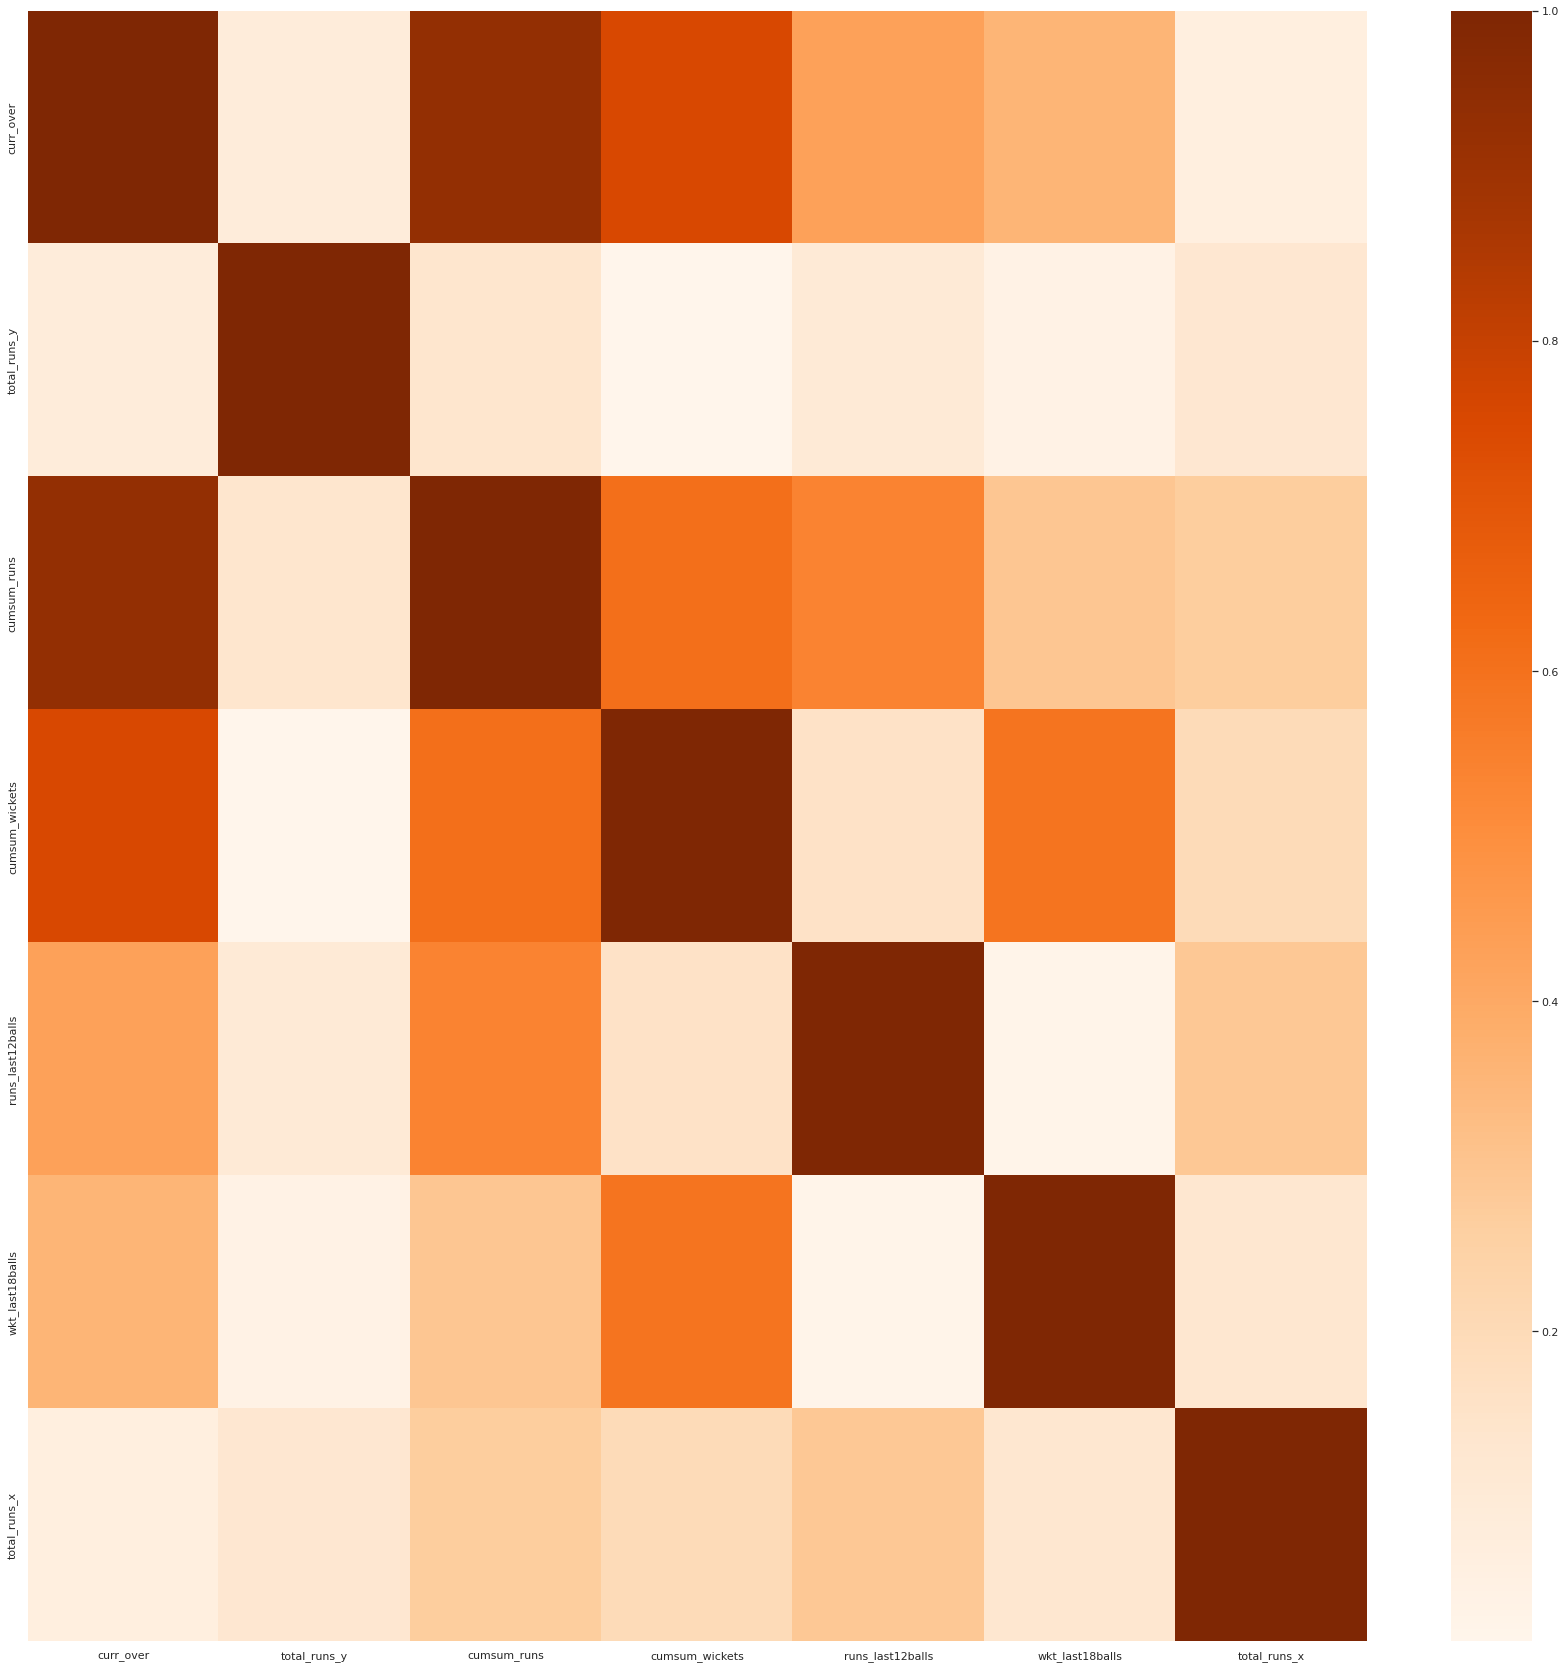

In [49]:
sb.heatmap(abs(new_ipl.corr()), cmap='Oranges')

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=6, shuffle=True)
print(f'Shape of x_train : {x_train.shape}')
print(f'Shape of x_test : {x_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of x_train : (134308, 6)
Shape of x_test : (44770, 6)
Shape of y_train : (134308,)
Shape of y_test : (44770,)


In [51]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Deep Learning Models

---


### Classification Model

In [64]:
model1 = Sequential()

model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1))

model1.compile(optimizer='adam', loss='mse')

In [65]:
model1.fit(x=x_train, y=y_train, epochs=400, validation_data=(x_test,y_test))

Epoch 1/400
4198/4198 [==============================] - 13s 3ms/step - loss: 3996.3918 - val_loss: 831.9099
Epoch 2/400
4198/4198 [==============================] - 13s 3ms/step - loss: 2680.5295 - val_loss: 803.0985
Epoch 3/400
4198/4198 [==============================] - 16s 4ms/step - loss: 2369.0642 - val_loss: 706.3379
Epoch 4/400
4198/4198 [==============================] - 14s 3ms/step - loss: 2106.8584 - val_loss: 683.3707
Epoch 5/400
4198/4198 [==============================] - 11s 3ms/step - loss: 1961.2754 - val_loss: 679.1862
Epoch 6/400
4198/4198 [==============================] - 14s 3ms/step - loss: 1880.6552 - val_loss: 649.0183
Epoch 7/400
4198/4198 [==============================] - 12s 3ms/step - loss: 1822.1455 - val_loss: 644.3134
Epoch 8/400
4198/4198 [==============================] - 11s 3ms/step - loss: 1764.9716 - val_loss: 596.6921
Epoch 9/400
4198/4198 [==============================] - 16s 4ms/step - loss: 1714.4200 - val_loss: 603.7936
Epoch 10/400
4198/4

In [67]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

Number of Trainable params are 3073

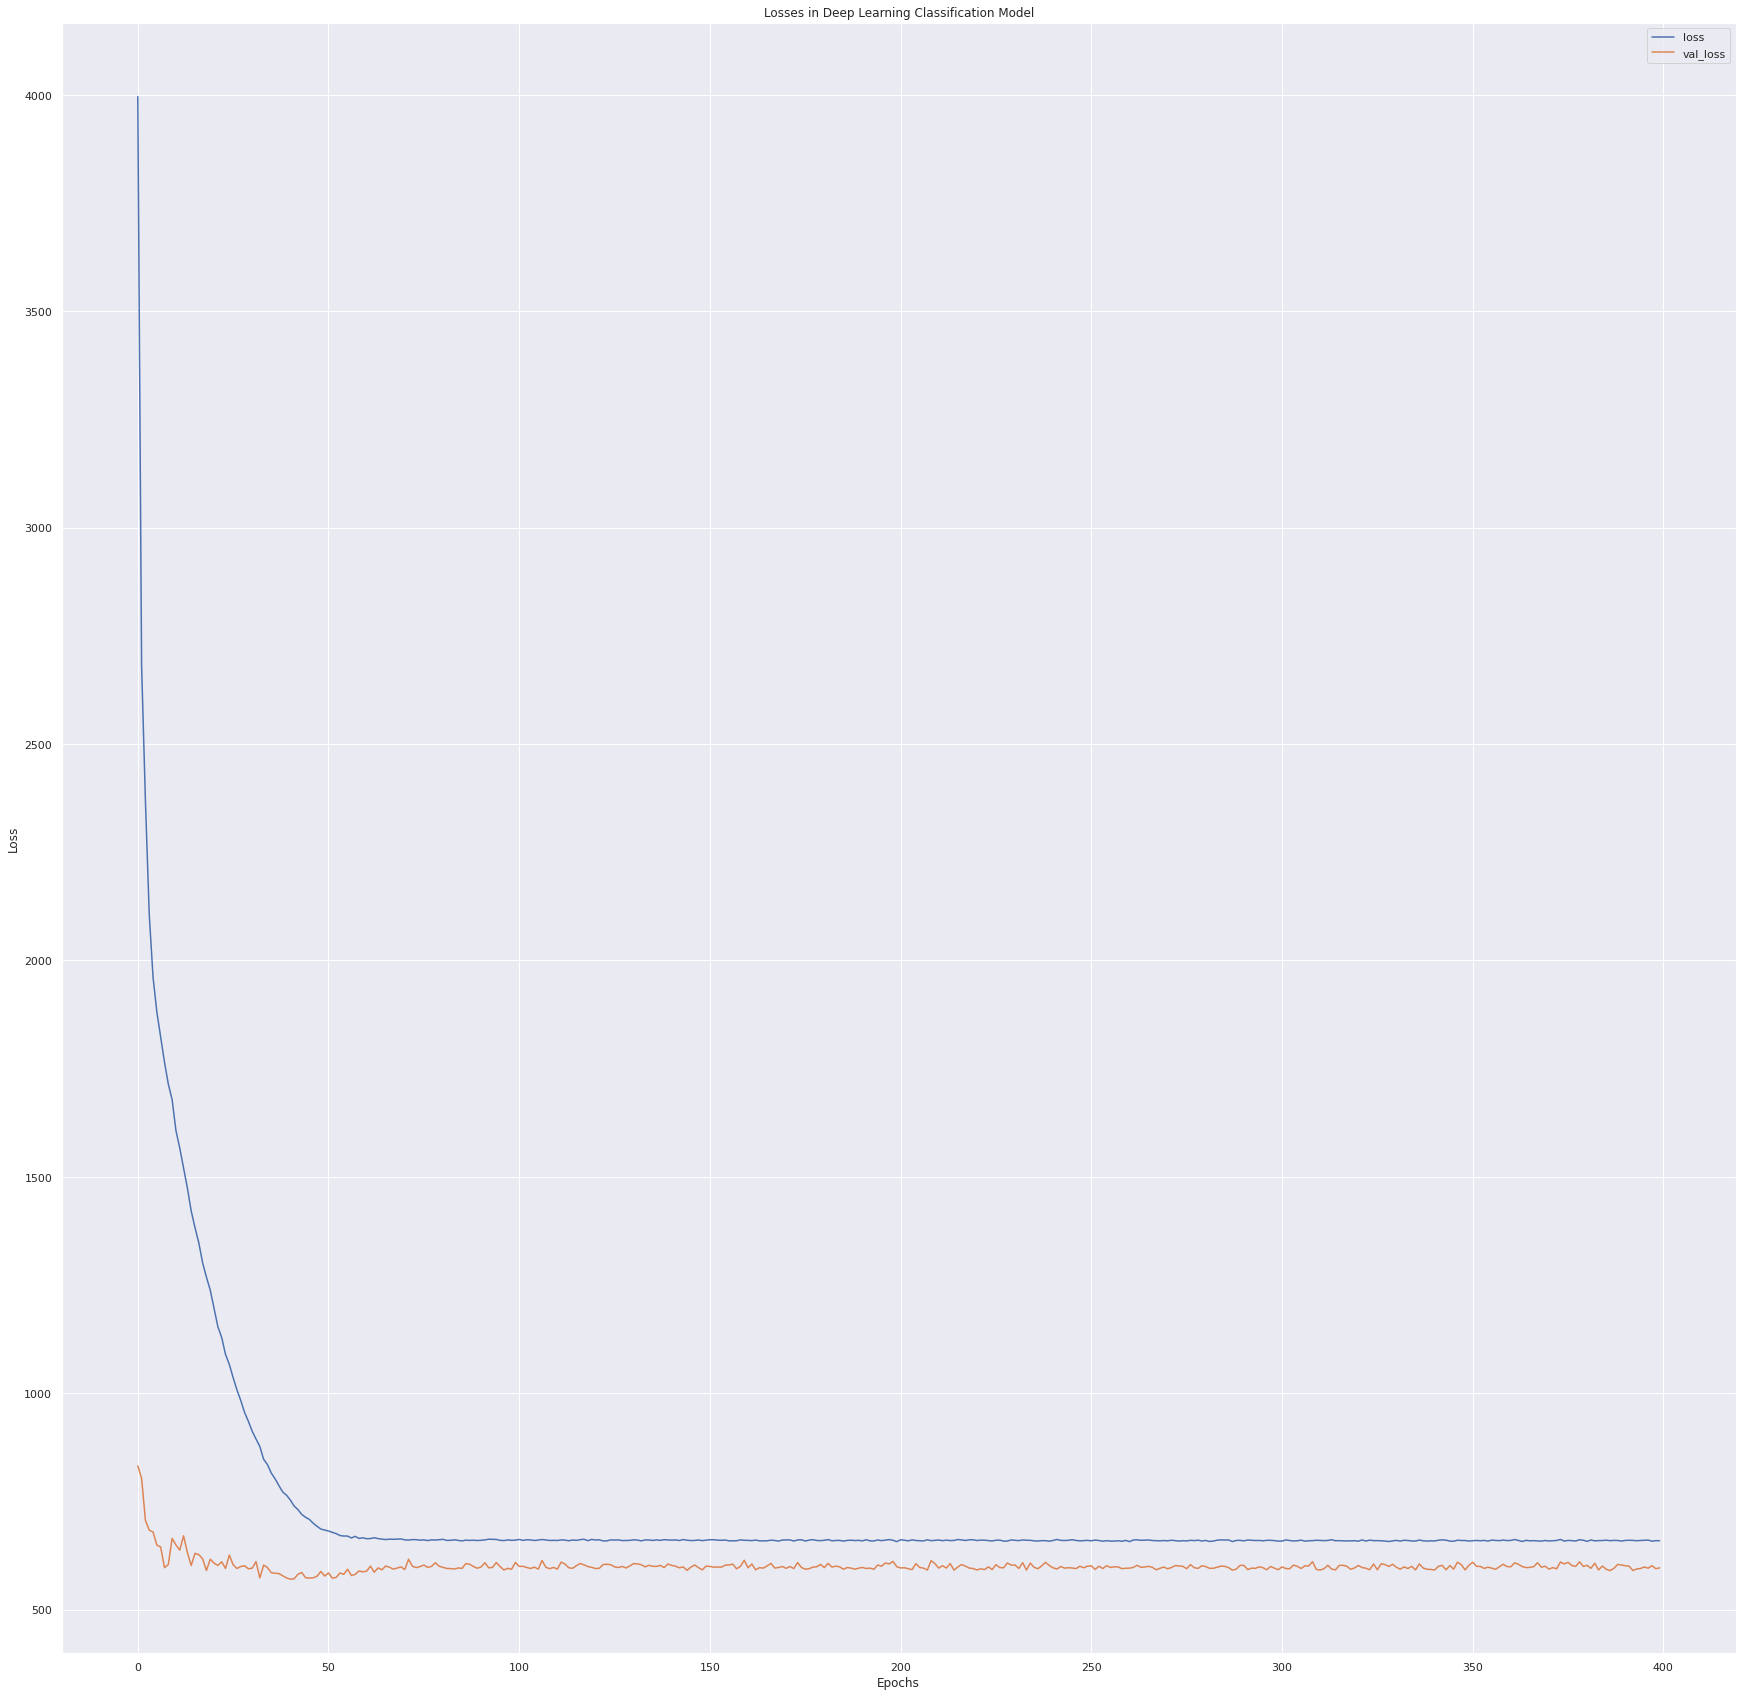

In [66]:
loss1 = pd.DataFrame(model1.history.history)
plt.rcParams.update({'font.size': 15})
loss1.plot()
plt.title('Losses in Deep Learning Classification Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [69]:
pred5 = np.around(model1.predict(x_test),0)
print(f'Accuracy : {round(accuracy_score(y_test, pred5)*100,2)}%')
print(f'Precision : {round(precision_score(y_test, pred5, average="weighted")*100,2)}%')
print(f'Recall : {round(recall_score(y_test, pred5, average="weighted")*100,2)}%')
print(f'F1 Score : {round(f1_score(y_test, pred5, average="weighted")*100,2)}%')

1400/1400 [==============================] - 2s 2ms/step
Accuracy : 2.03%
Precision : 2.01%
Recall : 2.03%
F1 Score : 1.67%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Regression Model

In [70]:
model2 = Sequential()

model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(50, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1))

model2.compile(optimizer='adam', loss='mse')

In [74]:
model2.fit(x=x_train, y=y_train, epochs=80,
		validation_data=(x_test,y_test))

Epoch 1/80
4198/4198 [==============================] - 14s 3ms/step - loss: 4476.3809 - val_loss: 956.5908
Epoch 2/80
4198/4198 [==============================] - 10s 2ms/step - loss: 3030.5911 - val_loss: 828.1314
Epoch 3/80
4198/4198 [==============================] - 10s 2ms/step - loss: 2845.3325 - val_loss: 726.9241
Epoch 4/80
4198/4198 [==============================] - 11s 3ms/step - loss: 2680.2434 - val_loss: 712.1297
Epoch 5/80
4198/4198 [==============================] - 15s 4ms/step - loss: 2554.3574 - val_loss: 772.5080
Epoch 6/80
4198/4198 [==============================] - 13s 3ms/step - loss: 2394.6436 - val_loss: 757.3345
Epoch 7/80
4198/4198 [==============================] - 14s 3ms/step - loss: 2266.1721 - val_loss: 655.0077
Epoch 8/80
4198/4198 [==============================] - 14s 3ms/step - loss: 2138.5120 - val_loss: 735.6512
Epoch 9/80
4198/4198 [==============================] - 17s 4ms/step - loss: 2055.2324 - val_loss: 662.0114
Epoch 10/80
4198/4198 [=====

In [75]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                224       
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 50)                1650      
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                816       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

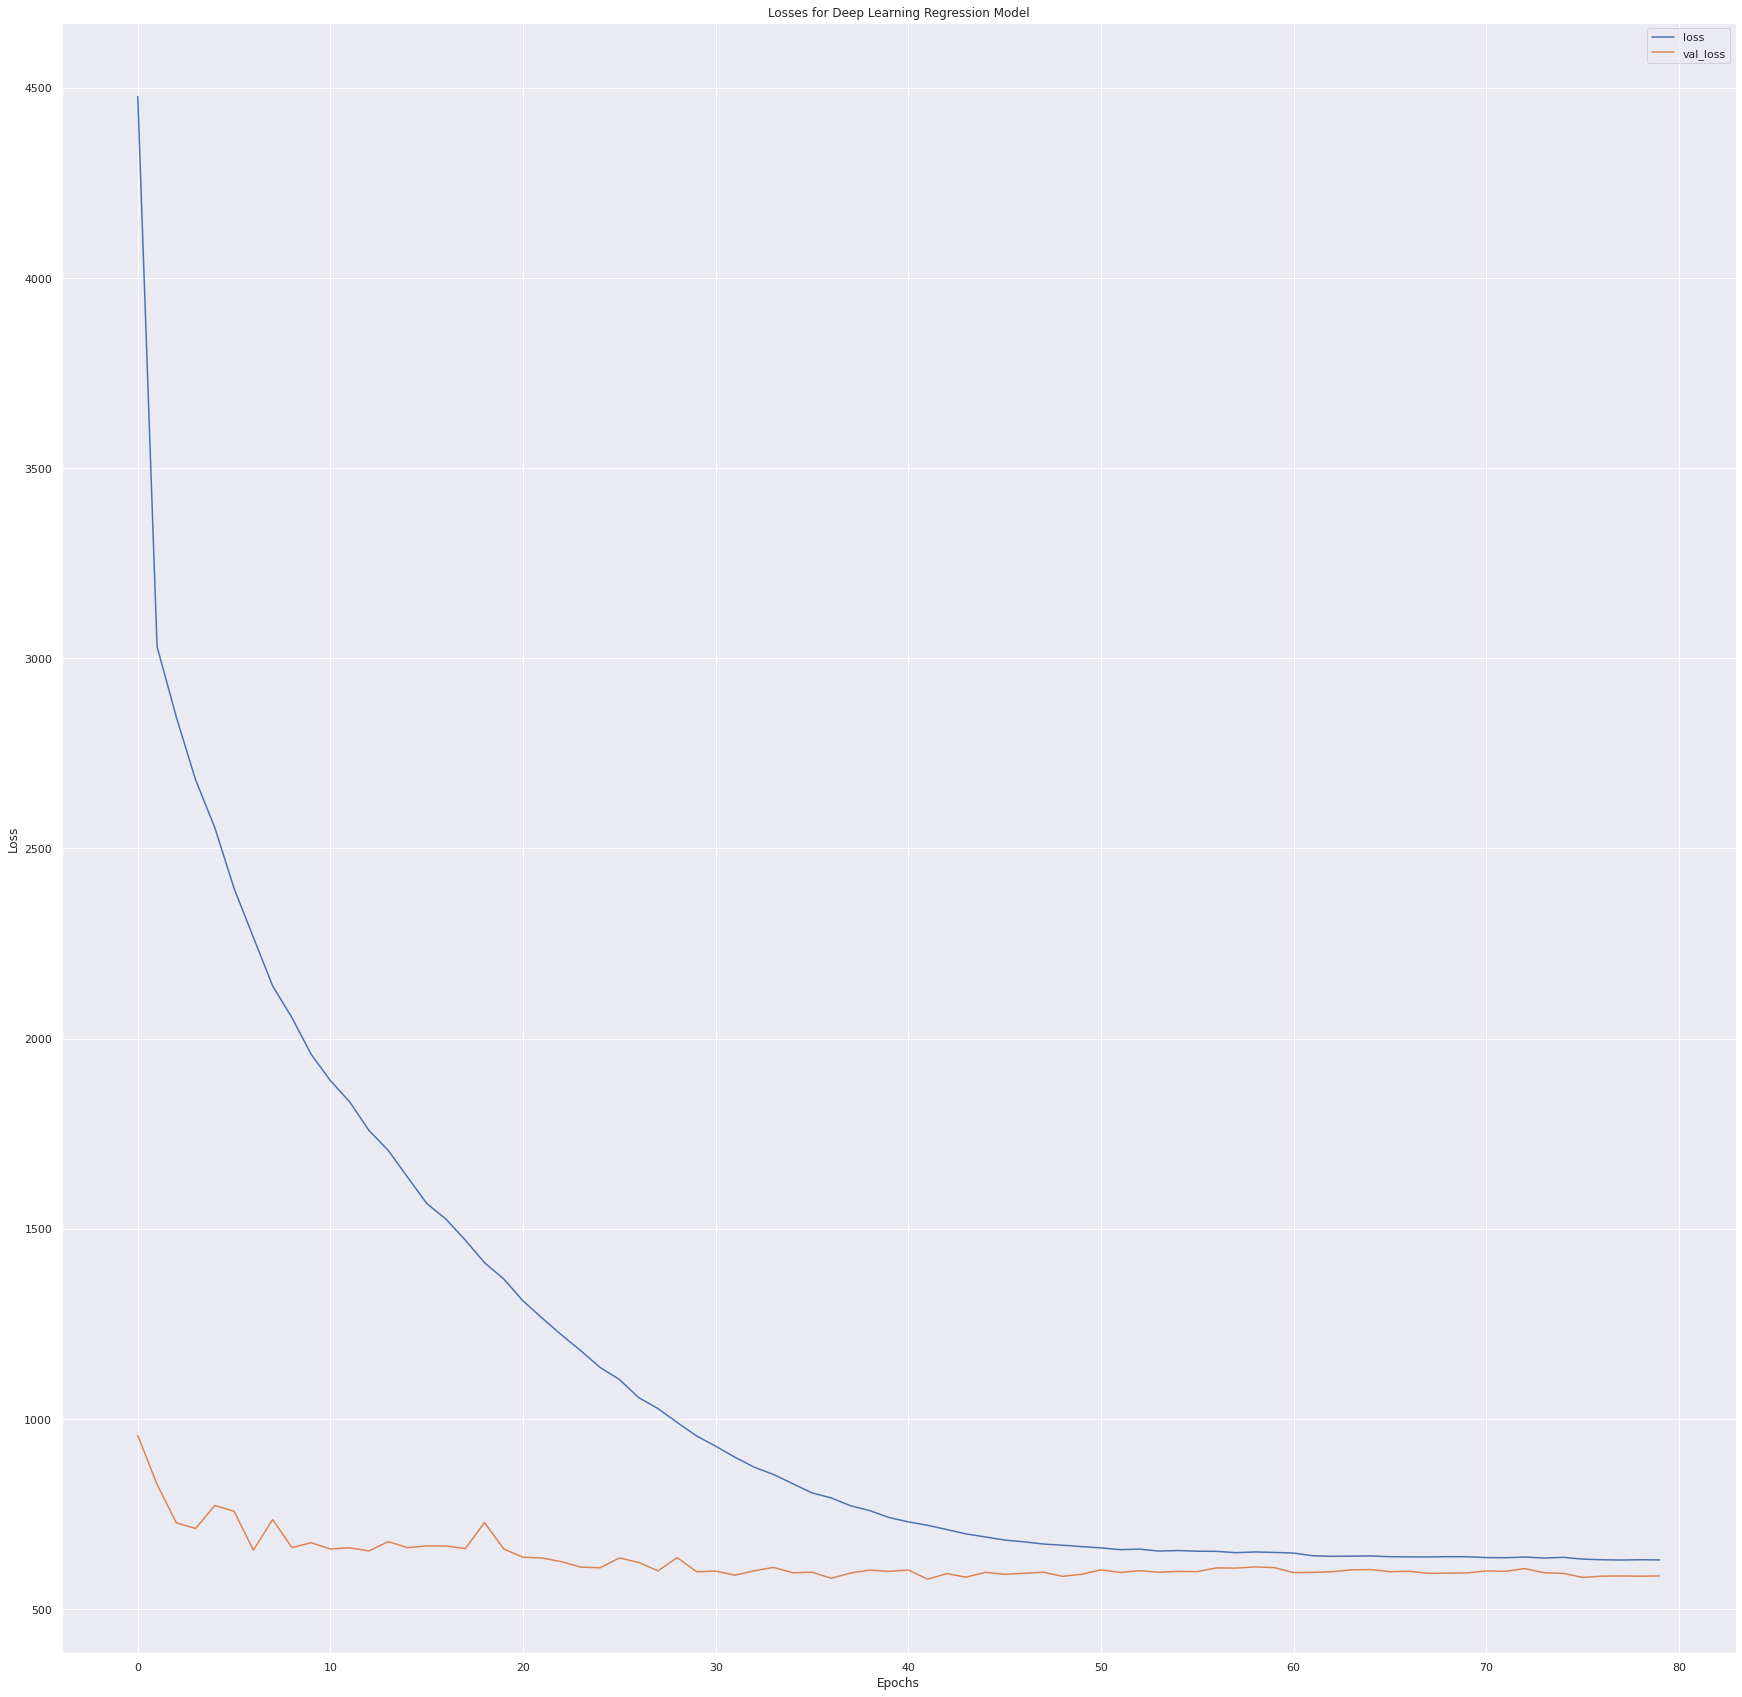

In [76]:
loss2 = pd.DataFrame(model2.history.history)
plt.rcParams.update({'font.size': 15})
loss2.plot()
plt.title('Losses for Deep Learning Regression Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [79]:
pred6 = model2.predict(x_test).astype('int')
print(f'RMSE : {round(np.sqrt(mean_squared_error(y_test, pred6)), 2)}')
print(f'R\u00b2 Score : {round(r2_score(y_test, pred6), 2)}')

1400/1400 [==============================] - 2s 2ms/step
RMSE : 24.23
R² Score : 0.36


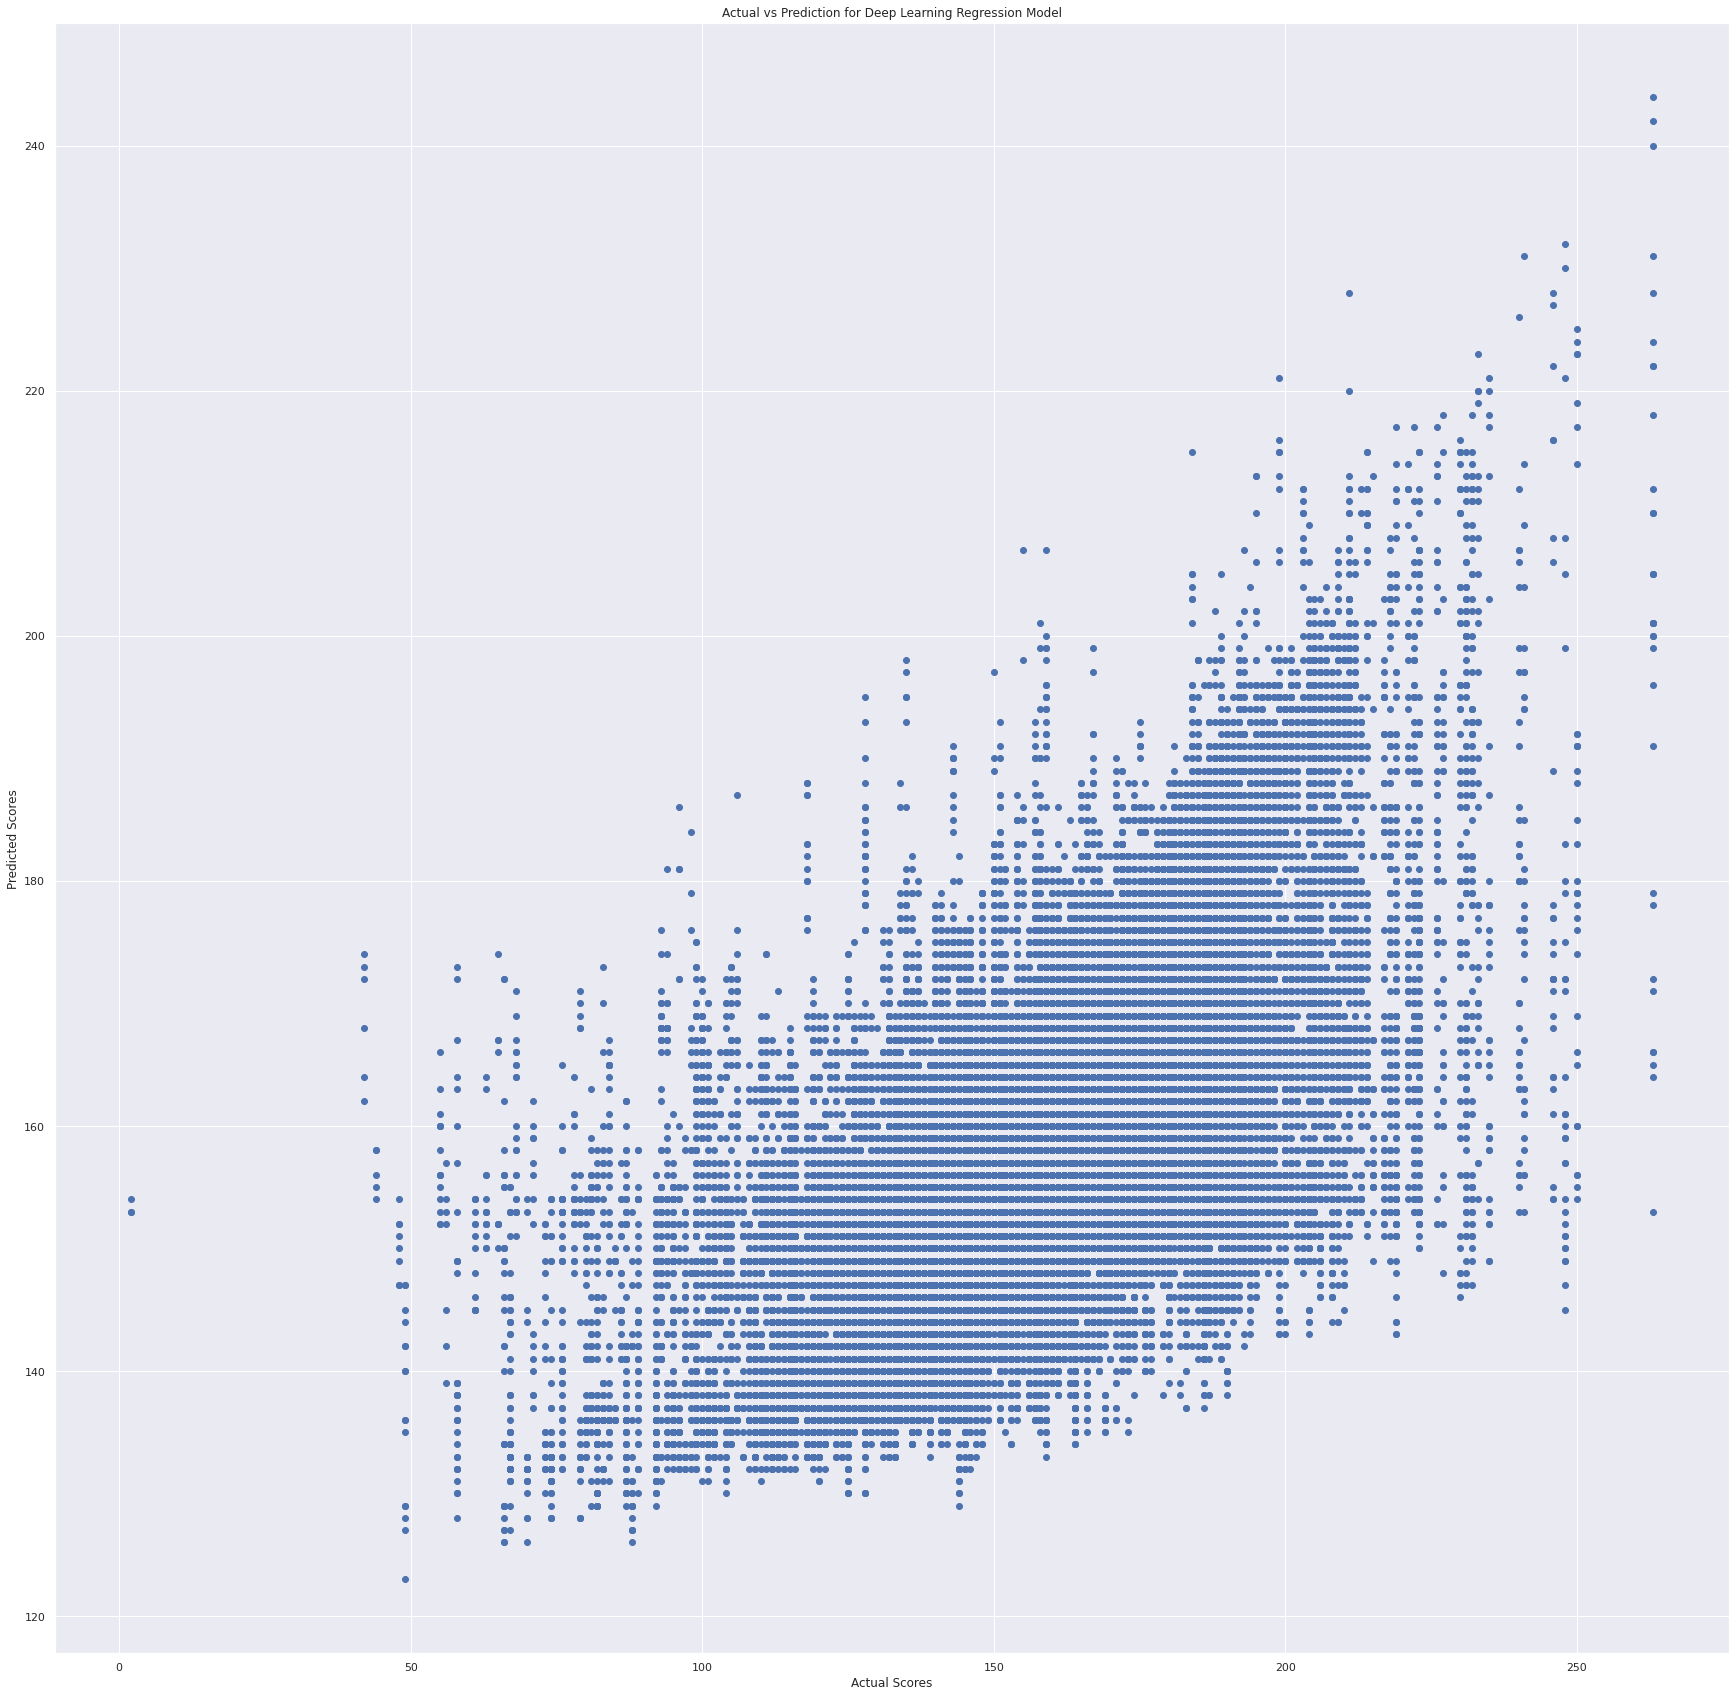

In [78]:
plt.rcParams.update({'font.size': 15})
plt.scatter(y_test, pred6)
plt.title('Actual vs Prediction for Deep Learning Regression Model')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.show()